<a href="https://colab.research.google.com/github/KameswaraRaoDoddi/MyProject/blob/master/Simple_Linear_Regression_CO2Emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About this Notebook**

In this notebook, we learn how to use scikit-learn to implement simple linear regression. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, evaluate your model using test set, and finally use model to predict unknown value.

**Table of contents**
* Understanding the Data
* Reading the data in
* Data Exploration
* Simple Regression Model


**Importing Needed packages**

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline

**Downloading Data**

To download the data, we will use !wget to download it from IBM Object Storage.

In [5]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2021-03-07 13:10:35--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2021-03-07 13:10:35 (1.66 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



**Reading the data in**

In [6]:
df =pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


**Data Exploration**

Lets first have a descriptive exploration on our data.

In [9]:
# summarize the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


Lets select some features to explore more.

In [10]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


we can plot each of these features:

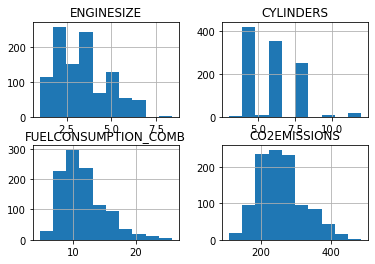

In [13]:
vis = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
vis.hist()
plt.show()

Now, lets plot each of these features vs the Emission, to see how linear is their relation:

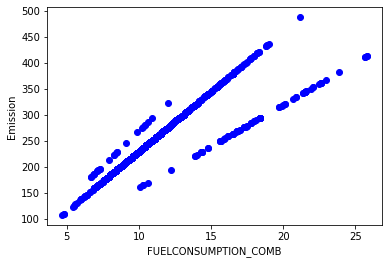

In [14]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

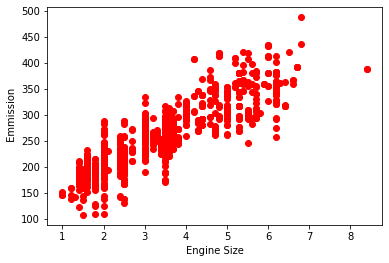

In [15]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'red')
plt.xlabel("Engine Size")
plt.ylabel(" Emmission")
plt.show()

**Practice**
plot CYLINDER vs the Emission, to see how linear is their relation:

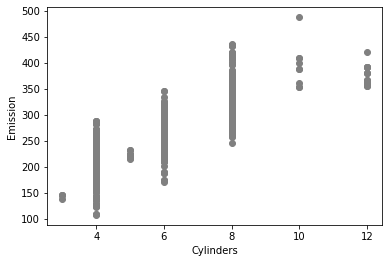

In [16]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = "grey")
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

**Creating train and test dataset**

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [17]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test  = cdf[~msk]

**Simple Regression Model**

Linear Regression fits a linear model with coefficients  𝜃=(𝜃1,...,𝜃𝑛)  to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation.

Train data distribution

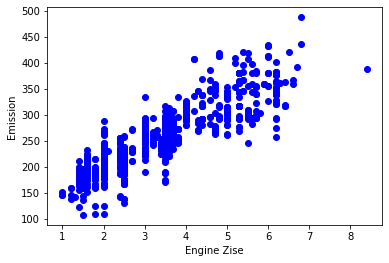

In [18]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = "blue")
plt.xlabel("Engine Zise")
plt.ylabel("Emission")
plt.show()

**Modeling**

Using sklearn package to model data.

In [21]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.28996914]]
Intercept:  [124.39535226]


As mentioned before, Coefficient and Intercept in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. Notice that all of the data must be available to traverse and calculate the parameters.

Plot outputs

we can plot the fit line over the data:

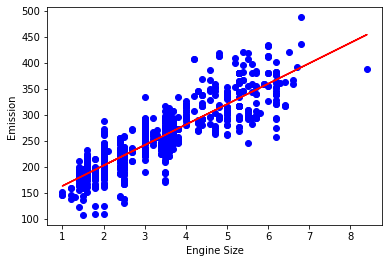

In [23]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = "blue")
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

**Evaluation**

we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

* Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
* Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
* Root Mean Squared Error (RMSE): This is the square root of the Mean Square 
Error.
* R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [24]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 22.85
Residual sum of squares (MSE): 914.82
R2-score: 0.73


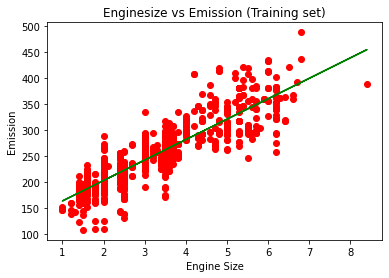

In [25]:
plt.scatter(train_x, train_y, color = "red")
plt.plot(train_x, regr.predict(train_x), color = "green")
plt.title("Enginesize vs Emission (Training set)")
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

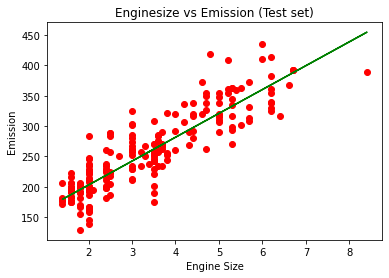

In [30]:
plt.scatter(test_x, test_y, color = "red")
plt.plot(test_x, test_y_hat, color = "green")
plt.title("Enginesize vs Emission (Test set)")
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()